<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/RAG_ON_COMPLEX_PDF_Using_llamaparse_langchain_qdrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install required dependencies

In [2]:
%%writefile requirements.txt
langchain
langchain-community
llama-parse
fastembed
qdrant_client
python-dotenv
langchain-groq
chainlit
fastembed
unstructured[md]


Writing requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.2/223.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 7.3 MB/s eta 0:00:00

In [61]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.2 MB/s eta 0:00:00
  Created wheel for pypika: filename=PyPika-0.48.9-py2.py3-no

## Download the content

In [4]:
!wget "https://github.com/sudarshan-koirala/RAG-chat-with-documents/blob/main/data/uber_10q_march_2022.pdf"

--2024-04-06 14:23:05--  https://github.com/sudarshan-koirala/RAG-chat-with-documents/blob/main/data/uber_10q_march_2022.pdf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uber_10q_march_2022.pdf’

uber_10q_march_2022     [ <=>                ] 145.85K   928KB/s    in 0.2s    

2024-04-06 14:23:06 (928 KB/s) - ‘uber_10q_march_2022.pdf’ saved [149348]



## Set up the environment varibales

In [5]:
from google.colab import userdata

llamaparse_api_key = userdata.get('LLAMA_CLOUD_API_KEY')

## Import required dependencies

In [62]:
##### LLAMAPARSE #####
from llama_parse import LlamaParse

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_community.document_loaders import DirectoryLoader
#
import joblib
import os
import nest_asyncio  # noqa: E402
nest_asyncio.apply()

## Process the data

In [9]:
!mkdir data

In [10]:
import shutil
shutil.copy("./uber_10q_march_2022.pdf", "./data")

'./data/uber_10q_march_2022.pdf'

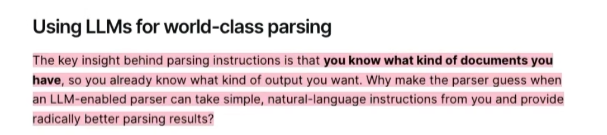

#### As per the free
* 7,000 free pages per week. Then $0.003
per page ($3 per 1,000 pages).
* 1000 pages per day

https://www.llamaindex.ai/blog/launching-the-first-genai-native-document-parsing-platform

## LlamaParse parameters

* api_key: str = Field(
  default="",
  
  description="The API key for the LlamaParse API.",

  )
    
* base_url: str = Field(
        default=DEFAULT_BASE_URL,
        description="The base URL of the Llama Parsing API.",
    )
* result_type: ResultType = Field(
        default=ResultType.TXT, description="The result type for the parser."
    )
* num_workers: int = Field(
        default=4,
        gt=0,
        lt=10,
        description="The number of workers to use sending API requests for parsing."
    )
* check_interval: int = Field(
        default=1,
        description="The interval in seconds to check if the parsing is done.",
    )
* max_timeout: int = Field(
        default=2000,
        description="The maximum timeout in seconds to wait for the parsing to finish.",
    )
* verbose: bool = Field(
        default=True, description="Whether to print the progress of the parsing."
    )
* language: Language  = Field(
         default=Language.ENGLISH, description="The language of the text to parse."
    )
* parsing_instruction: Optional[str] = Field(
        default="",
        description="The parsing instruction for the parser."
    )

In [25]:
def load_or_parse_data():
    data_file = "./data/parsed_data.pkl"

    if os.path.exists(data_file):
        # Load the parsed data from the file
        parsed_data = joblib.load(data_file)
    else:
        # Perform the parsing step and store the result in llama_parse_documents
        parsingInstructionUber10k = """The provided document is a quarterly report filed by Uber Technologies,
        Inc. with the Securities and Exchange Commission (SEC).
        This form provides detailed financial information about the company's performance for a specific quarter.
        It includes unaudited financial statements, management discussion and analysis, and other relevant disclosures required by the SEC.
        It contains many tables.
        Try to be precise while answering the questions"""
        parser = LlamaParse(api_key=llamaparse_api_key,
                            result_type="markdown",
                            parsing_instruction=parsingInstructionUber10k,
                            max_timeout=5000,)
        llama_parse_documents = parser.load_data("./data/uber_10q_march_2022 (1).pdf")


        # Save the parsed data to a file
        print("Saving the parse results in .pkl format ..........")
        joblib.dump(llama_parse_documents, data_file)

        # Set the parsed data to the variable
        parsed_data = llama_parse_documents

    return parsed_data

## Create Index

In [90]:
# Create vector database
from langchain_community.document_loaders import UnstructuredMarkdownLoader
def create_vector_database():
    """
    Creates a vector database using document loaders and embeddings.

    This function loads urls,
    splits the loaded documents into chunks, transforms them into embeddings using OllamaEmbeddings,
    and finally persists the embeddings into a Chroma vector database.

    """
    # Call the function to either load or parse the data
    llama_parse_documents = load_or_parse_data()
    print(llama_parse_documents[0].text[:100])

    with open('data/output.md', 'a') as f:  # Open the file in append mode ('a')
        for doc in parsed_data:
            f.write(doc.text + '\n')

    markdown_path = "/content/data/output.md"
    loader = UnstructuredMarkdownLoader(markdown_path)

   #loader = DirectoryLoader('data/', glob="**/*.md", show_progress=True)
    documents = loader.load()
    # Split loaded documents into chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100)
    docs = text_splitter.split_documents(documents)

    #len(docs)
    print(f"length of documents loaded: {len(documents)}")
    print(f"total number of document chunks generated :{len(docs)}")
    #docs[0]

    # Initialize Embeddings
    embed_model = FastEmbedEmbeddings(model_name="BAAI/bge-base-en-v1.5")

    # Create and persist a Chroma vector database from the chunked documents
    vs = Chroma.from_documents(
        documents=docs,
        embedding=embed_model,
        persist_directory="chroma_db_llamaparse1",  # Local mode with in-memory storage only
        collection_name="rag"
    )

    #query it
    #query = "what is the agend of Financial Statements for 2022 ?"
    #found_doc = qdrant.similarity_search(query, k=3)
    #print(found_doc[0][:100])
    #print(qdrant.get())

    print('Vector DB created successfully !')
    return vs,embed_model

## Process the data and create the vectorstore

In [27]:
parsed_data = load_or_parse_data()

Started parsing the file under job_id 07cc35b5-384b-4c8d-b7ca-4b186af3716b
.Saving the parse results in .pkl format ..........


In [38]:
parsed_data[0].text

'# Uber Technologies, Inc. - Quarterly Report\n\n# Uber Technologies, Inc. - Quarterly Report\n\nForm 10-Q filed with the Securities and Exchange Commission for the quarterly period ended March 31, 2022.\n\n## Company Information:\n\n- Company Name: Uber Technologies, Inc.\n- Address: 1515 3rd Street, San Francisco, California 94158\n- Telephone: (415) 612-8582\n- IRS Employer ID: 45-2647441\n- SEC File Number: 001-38902\n- Common Stock: UBER, New York Stock Exchange\n\n## Filing Information:\n\n- Reports Filed: Yes\n- Interactive Data File Submitted: Yes\n- Filer Status: Large accelerated filer\n- Shell Company: No\n- Common Stock Outstanding: 1,963,660,253 shares (as of May 2, 2022)\n---\n# Uber Technologies, Inc. Quarterly Report\n\n# UBER TECHNOLOGIES, INC. - Quarterly Report\n\n## Table of Contents\n\n- Special Note Regarding Forward-Looking Statements\n- PART I - FINANCIAL INFORMATION\n- - Item 1. Financial Statements (unaudited)\n- Item 2. Management\'s Discussion and Analysis o

In [91]:
vs,embed_model = create_vector_database()

Started parsing the file under job_id 7f499386-f94f-4d0d-b471-3b8bcf83ec2f
Saving the parse results in .pkl format ..........
# Uber Technologies, Inc. - Quarterly Report

# Uber Technologies, Inc. - Quarterly Report

Form 10-
length of documents loaded: 1
total number of document chunks generated :725


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

Vector DB created successfully !


## Getting Started with  Groq API

Real-time AI systems rely heavily on fast inference. Inference APIs from industry leaders like OpenAI, Google, and Azure enable rapid decision-making. Groq’s Language Processing Unit (LPU) technology is a standout solution, enhancing AI processing efficiency.

## What is Groq ?

Groq is a California-based AI solutions startup founded in 2016 with its headquarters located in Mountain View. Groq, which specializes in ultra-low latency AI inference, has advanced AI computing performance significantly. Groq is a prominent participant in the AI technology space, having registered its name as a trademark and assembled a global team committed to democratizing access to AI.

## Features

* Groq’s Language Processing Unit (LPU), an innovative technology, aims to enhance AI computing performance, particularly for Large Language Models (LLMs). The Groq LPU system strives to deliver real-time, low-latency experiences with exceptional inference performance. Groq achieved over 300 tokens per second per user on Meta AI’s Llama-2 70B model, setting a new industry benchmark.

* Groq’s first-generation GroqChip, part of the LPU system, features a tensor streaming architecture optimized for speed, efficiency, accuracy, and cost-effectiveness. This chip surpasses incumbent solutions, setting new records in foundational LLM speed measured in tokens per second per user.

* The Groq LPU system boasts ultra-low latency capabilities crucial for AI support technologies. Specifically designed for sequential and compute-intensive GenAI language processing, it outperforms conventional GPU solutions, ensuring efficient processing for tasks like natural language creation and understanding.

## Getting Started with Groq
Right now, Groq is providing free-to-use API endpoints to the Large Language Models running on the Groq LPU – Language Processing Unit. To get started, visit this [page](https://console.groq.com/keys) and click on login. T

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

In [43]:
!pip install groq

## Instantiate LLM

In [66]:
# Importing Necessary Libraries
import os
from groq import Groq
from langchain_groq import ChatGroq

chat_model = ChatGroq(temperature=0,
                      model_name="mixtral-8x7b-32768",
                      api_key=userdata.get("GROQ_API_KEY"),)



## Instantiate Vectorstore

In [110]:
 vectorstore = Chroma(embedding_function=embed_model,
                      persist_directory="chroma_db_llamaparse1",
                      collection_name="rag")
 #
 retriever=vectorstore.as_retriever(search_kwargs={'k': 3})

In [94]:
vectorstore.get()

{'ids': ['0073d52d-2753-4868-bbac-cdff23439644',
  '010feb3c-24c9-43be-954b-f3595e42c522',
  '01108cb0-4c19-4287-9930-ba5e17a56870',
  '014da589-42b3-488b-b3c8-2165b91c010c',
  '0164ad8b-717d-48ed-9648-4be29e6490fa',
  '0177755b-3b7c-4908-9f53-c5f778235fcb',
  '0199bc8c-5650-430d-9e3e-3cfa9ea74331',
  '0231131c-094d-40f1-9512-66b5c8b1297e',
  '02e67a04-e125-4f9d-ac2b-a340fff7e61d',
  '03238644-f6f3-4d6a-803d-8f392690aa3e',
  '036061f0-5153-4318-982d-cccd1348dadd',
  '0380b701-9093-4480-a2f6-466f36e47e75',
  '03df5342-618e-46a2-b140-6e136cc0fdda',
  '04468943-ace8-4901-b8e3-f07733bf275e',
  '045e7023-9e2a-4acc-a17f-06a08ecc3ef5',
  '046c6ff0-8da8-415c-846b-06ec381738ed',
  '04eb0ee3-4770-4568-b4df-391cbad794a4',
  '04f272db-6ff3-4596-a2c7-7a900ad4a05c',
  '05a925af-84b4-45f3-96a0-21e786b6d5c4',
  '05dcf9df-e329-484f-a28c-93c263984de2',
  '05f914bb-6024-4964-999a-135a613786d0',
  '06d4567a-05ef-48b5-a4d3-0db51e309ebd',
  '06de9a65-3ac2-481e-bd19-452939e493a6',
  '07adbe7e-112c-4261-8086-

In [95]:
custom_prompt_template = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

In [96]:
from langchain.prompts import PromptTemplate
def set_custom_prompt():
    """
    Prompt template for QA retrieval for each vectorstore
    """
    prompt = PromptTemplate(template=custom_prompt_template,
                            input_variables=['context', 'question'])
    return prompt

In [71]:
prompt = set_custom_prompt()
prompt

PromptTemplate(input_variables=['context', 'question'], template="Use the following pieces of information to answer the user's question.\nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nContext: {context}\nQuestion: {question}\n\nOnly return the helpful answer below and nothing else.\nHelpful answer:\n")

In [111]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(llm=chat_model,
                               chain_type="stuff",
                               retriever=retriever,
                               return_source_documents=True,
                               chain_type_kwargs={"prompt": prompt})

In [98]:
response = qa.invoke({"query": "what is the Cash and cash equivalents as of December 31,2021?"})

In [99]:
response

{'query': 'what is the Cash and cash equivalents as of December 31,2021?',
 'result': 'The text does not provide the exact amount of cash and cash equivalents as of December 31, 2021. However, it is stated that as of March 31, 2022, $4.2 billion in cash and cash equivalents was reported, with $2.2 billion of that held by foreign subsidiaries. There are no material changes mentioned in the contractual obligations or cash and cash equivalents from the end of the year 2021 through March 31, 2022. Therefore, it can be inferred that the cash and cash equivalents as of December 31, 2021, would be relatively close to $4.2 billion.',
 'source_documents': [Document(page_content="Other Information\n\nAs of March 31, 2022, $2.2 billion of our $4.2 billion in cash and cash equivalents was held by our foreign subsidiaries. Cash held outside the United States may be repatriated, subject to certain limitations, and would be available to be used to fund our domestic operations. Repatriation of funds m

In [100]:
response['result']

'The text does not provide the exact amount of cash and cash equivalents as of December 31, 2021. However, it is stated that as of March 31, 2022, $4.2 billion in cash and cash equivalents was reported, with $2.2 billion of that held by foreign subsidiaries. There are no material changes mentioned in the contractual obligations or cash and cash equivalents from the end of the year 2021 through March 31, 2022. Therefore, it can be inferred that the cash and cash equivalents as of December 31, 2021, would be relatively close to $4.2 billion.'

In [106]:
response = qa.invoke({"query": "What is the revenue in the year 2021 ?"})

In [107]:
response["result"]

'The revenue for the year 2021 was $2,903 million.'

In [108]:
response

{'query': 'What is the revenue in the year 2021 ?',
 'result': 'The revenue for the year 2021 was $2,903 million.',
 'source_documents': [Document(page_content='Components of Condensed Consolidated Statements of Operations as a Percentage of Revenue\n| |Three Months Ended March 31, 2021|Three Months Ended March 31, 2022|\n|---|---|---|\n|Revenue|100%|100%|\n|Costs and Expenses| | |\n|Cost of Revenue (excl. depreciation and amortization)|59%|59%|\n|Operations and Support|15%|8%|\n|Sales and Marketing|38%|18%|\n|Research and Development|18%|9%|\n|General and Administrative|16%|9%|\n|Depreciation and Amortization|7%|4%|\n|Total Costs and Expenses|152%|107%|\n|Loss from Operations|(52%)|(7%)|\n|Interest Expense|(4%)|(2%)|\n|Other Income (Expense), Net|59%|(81%)|\n|Income (Loss) Before Income Taxes and Equity Method Investments|2%|(90%)|\n|Provision for (Benefit from) Income Taxes|6%|(3%)|\n|Income (Loss) from Equity Method Investments|—%|—%|\n|Net Loss including Non-Controlling Interests|(

In [112]:
response = qa.invoke({"query": "What is the revenue in the year 2022 ?"})
response['result']

'The revenue for the three months ended March 31, 2022 was $4.9 billion. This value is not provided directly in the text, but it can be calculated as follows: revenue as a percentage of revenue is 100%, so for the three months ended March 31, 2022, the revenue is 100% of $4.9 billion.'

In [113]:
response["source_documents"]

[Document(page_content='Components of Condensed Consolidated Statements of Operations as a Percentage of Revenue\n| |Three Months Ended March 31, 2021|Three Months Ended March 31, 2022|\n|---|---|---|\n|Revenue|100%|100%|\n|Costs and Expenses| | |\n|Cost of Revenue (excl. depreciation and amortization)|59%|59%|\n|Operations and Support|15%|8%|\n|Sales and Marketing|38%|18%|\n|Research and Development|18%|9%|\n|General and Administrative|16%|9%|\n|Depreciation and Amortization|7%|4%|\n|Total Costs and Expenses|152%|107%|\n|Loss from Operations|(52%)|(7%)|\n|Interest Expense|(4%)|(2%)|\n|Other Income (Expense), Net|59%|(81%)|\n|Income (Loss) Before Income Taxes and Equity Method Investments|2%|(90%)|\n|Provision for (Benefit from) Income Taxes|6%|(3%)|\n|Income (Loss) from Equity Method Investments|—%|—%|\n|Net Loss including Non-Controlling Interests|(4%)|(86%)|\n|Less: Net Income (Loss) Attributable to Non-Controlling Interests, Net of Tax|(4%)|(87%)|\n|Net Loss Attributable to Uber Te

In [114]:
response = qa.invoke({"query":"Comprehensive income (loss) attributable to Uber Technologies, Inc. "})

In [115]:
response['result']

'The comprehensive income (loss) attributable to Uber Technologies, Inc. for the three months ended March 31, 2021 was $1,081 million, and for the three months ended March 31, 2022 was $(5,911) million.'

In [116]:
response = qa.invoke({"query":"Net loss including non-controlling interests"})

In [117]:
response['result']

'The net loss including non-controlling interests for the three months ended March 31, 2021 was $(122) million and for the three months ended March 31, 2022 was $(5,918) million.'

In [130]:
response = qa.invoke({"query":"what is the Net cash used in operating activities for Mrach 31,2021? "})
response['result']

'Net cash used in operating activities for March 31, 2021 was $611 million.'

In [131]:
response["source_documents"]

[Document(page_content='Net cash used in operating activities was $611 million for the three months ended March 31, 2021, primarily consisting of $122 million of net loss, adjusted for certain non-cash items, which primarily included $1.7 billion gain on business divestiture and $281 million of stock-based compensation expense as well as a $412 million decrease in cash consumed by working capital primarily driven by an increase in our accrued expenses and other current liabilities.\n\nInvesting Activities\n\nNet cash used in investing activities was $135 million for the three months ended March 31, 2022, primarily consisting of $62 million in purchases of property and equipment and $59 million in acquisition of business, net of cash acquired.\n\nNet cash used in investing activities was $250 million for the three months ended March 31, 2021, primarily consisting of $803 million in purchases of non-marketable equity securities, $336 million in purchases of marketable securities and $216

In [132]:
query = "What was the amount spent in purchases of property and equipment as of  March 31, 2022 ?"
response = qa.invoke({"query":query})
response['result']

'$62 million was spent in purchases of property and equipment as of March 31, 2022.'

In [133]:
response["source_documents"]

[Document(page_content='Net cash used in operating activities was $611 million for the three months ended March 31, 2021, primarily consisting of $122 million of net loss, adjusted for certain non-cash items, which primarily included $1.7 billion gain on business divestiture and $281 million of stock-based compensation expense as well as a $412 million decrease in cash consumed by working capital primarily driven by an increase in our accrued expenses and other current liabilities.\n\nInvesting Activities\n\nNet cash used in investing activities was $135 million for the three months ended March 31, 2022, primarily consisting of $62 million in purchases of property and equipment and $59 million in acquisition of business, net of cash acquired.\n\nNet cash used in investing activities was $250 million for the three months ended March 31, 2021, primarily consisting of $803 million in purchases of non-marketable equity securities, $336 million in purchases of marketable securities and $216